Предложете соодветна репрезентација и напишете ги потребните функции во Python 
за да се реши следниот проблем за кој една можна почетна состојба е прикажана на сликата на следниот слајд.

На табла 7x9 поставени се три атоми (внимавајте, двата H-атоми се различни: едниот има линк во десно, а другиот има линк во лево). 
Полињата обоени во сива боја претставуваат препреки.

Играчот може да ја започне играта со избирање на кој било од трите атоми. 
Играчот во секој момент произволно избира точно еден од трите атоми и го „турнува“ тој атом во една од четирите насоки: горе, долу, лево или десно.
Движењето на „турнатиот“ атом продолжува во избраната насока се’ додека атомот не „удри“ во препрека или во некој друг атом (атомот секогаш застанува на првото поле што е соседно на препрека или на друг атом во соодветната насока).

Не е возможно ротирање на атомите (линковите на атомите секогаш ќе бидат поставени како што се на почетокот на играта). Исто така, не е дозволено атомите да излегуваат од таблата.

Целта на играта е атомите да се доведат во позиција во која ја формираат „молекулата“ прикажана десно од таблата. Играта завршува во моментот кога трите атоми ќе бидат поставени во бараната позиција, во произволни три соседни полиња од таблата.

Потребно е проблемот да се реши во најмал број на потези.

За сите тест примери изгледот и големината на таблата се исти како на примерот даден на сликата. За сите тест примери положбите на препреките се исти. За секој тест пример се менуваат почетните позиции на сите три атоми, соодветно. Во рамки на почетниот код даден за задачата се вчитуваат влезните аргументи за секој тест пример.

Движењата на атомите потребно е да ги именувате на следниот начин:

    RightX - за придвижување на атомот X надесно (X може да биде H1, O или H2)
    LeftX - за придвижување на атомот X налево (X може да биде H1, O или H2)
    UpX - за придвижување на атомот X нагоре (X може да биде H1, O или H2)
    DownX - за придвижување на атомот X надолу (X може да биде H1, O или H2)

Вашиот код треба да има само еден повик на функција за приказ на стандарден излез (print) со кој ќе ја вратите секвенцата на движења која треба да се направи за да може атомите од почетната позиција да се доведат до бараната позиција.

Треба да примените неинформирано пребарување. Врз основа на тест примерите треба самите да определите кое пребарување ќе го користите.

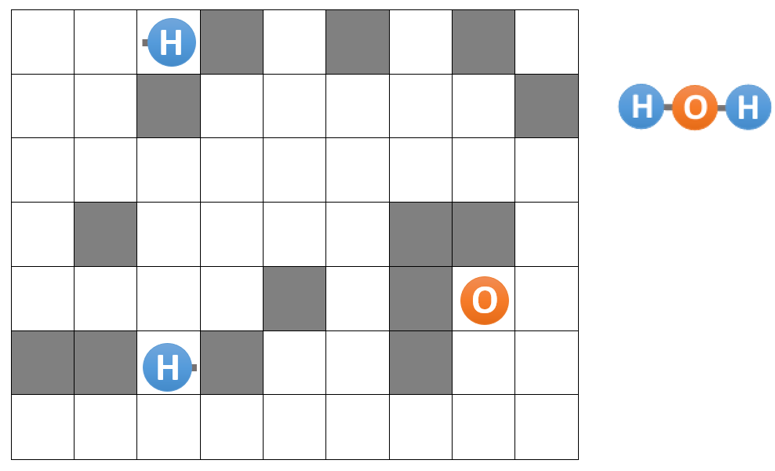

In [1]:
from IPython import display
display.Image('molecule1.png', width=300)

In [17]:
from collections import deque
import os
import sys

In [67]:
def table_limits(x, y):
    if 0 <= x <= 6 and 0 <= y <= 8:
        return True

In [91]:
def obstacles(x, y):
    obstacle_positions = {(0, 5), (1, 3), (1, 5), (2, 1), (3, 0), (3, 5), (4, 4), (5, 0), (6, 3), (6, 4), (6, 5), (7, 0), (7, 3), (8, 1)}
    return (y, x) not in obstacle_positions #vrakja tocno ako x,y ne e elem od m-vo obstacle_possitions

In [69]:
obstacles(0,4)

True

In [70]:
def find_pos_H1(matrix_state):
    for i, row in enumerate(matrix_state):
        for j, column in enumerate(row):
            if matrix_state[i][j] == 1:
                return (i,j)
    raise Exception("Go izgubivme atomot")

In [71]:
def find_pos_H2(matrix_state):
    for i, row in enumerate(matrix_state):
        for j, column in enumerate(row):
            if column == 2:
                return (i,j)
    return (0,0)

In [1]:
int('qfsdf')

ValueError: invalid literal for int() with base 10: 'qfsdf'

In [2]:
try:
    int('qfsdf')
except ValueError:
    print('dobro be')

dobro be


In [3]:
try:
    int('qfsdf')
except:
    print('dobro be')

dobro be


In [84]:
def find_pos_O(matrix_state):
    for i, row in enumerate(matrix_state):
        for j, column in enumerate(row):
            if column == 3:
                return (i,j)

In [85]:
def mismatch(x1,y1,x2,y2):
    if x1 == x2 and y1 == y2:
        return False
    else:
        return True

In [86]:
def is_valid(x1,y1,x2,y2):
    if table_limits(x1,y1) and obstacles(x1,y1) and mismatch(x1,y1,x2,y2):
        return True
    else:
        return False

In [75]:
#is_valid(0,6,0,6)

In [92]:
def end_check(new_state):  
    
    xo,yo = find_pos_O(new_state)
    xh_1,yh_1 = find_pos_H1(new_state)
    xh_2,yh_2 = find_pos_H2(new_state)
    if yh_1 == yo + 1 and xh_1 == xo and yh_2 == yo - 1 and xh_2 == xo:
        return True

In [93]:
def move_up(x,y):
    while is_valid(x,y):
        y += 1
    return x,y

In [94]:
def move_down(x,y):
    while is_valid(x,y):
        y -= 1
    return x,y

In [95]:
def move_right(x,y):
    while is_valid(x,y):
        x += 1
    return x,y

In [96]:
def move_left(x,y):
    while is_valid(x,y):
        x -= 1
    return x,y

In [97]:
def expand_check(state):
    states = []
    new_state_matrix = [list(row) for row in state]
    
    xo,yo = find_pos_O(new_state_matrix)
    xh_1,yh_1 = find_pos_H1(new_state_matrix)
    xh_2,yh_2 = find_pos_H2(new_state_matrix)

    moves = [(0,-1),(-1,0),(0,1),(1,0)]

    for (dxo,dyo),(dxh_1,dyh_1),(dxh_2,dyh_2) in zip(moves,moves,moves):
        new_state_matrix = [list(row) for row in state]
        new_xo = xo + dxo
        new_yo = yo + dyo
        new_xh_1 = xh_1 + dxh_1
        new_yh_1 = yh_1 + dyh_1
        new_xh_2 = xh_2 + dxh_2
        new_yh_2 = yh_2 + dyh_2

        if is_valid(new_xo,new_yo,new_xh_1,new_yh_1) and is_valid(new_xo,new_yo,new_xh_2,new_yh_2):
            new_state_matrix[xo][yo] = 0 # predhodnoto klajgo na nula
            new_state_matrix[new_xo][new_yo] = 3
        if is_valid(new_xh_1,new_yh_1,new_xo,new_yo) and is_valid(new_xh_1,new_yh_1,new_xh_2,new_yh_2):
            new_state_matrix[xh_1][yh_1] = 0 # predhodnoto klajgo na nula
            new_state_matrix[new_xh_1][new_yh_1] = 1
        if is_valid(new_xh_2,new_yh_2,new_xh_1,new_yh_1) and is_valid(new_xh_2,new_yh_2,new_xo,new_yo):
            new_state_matrix[xh_2][yh_2] = 0 # predhodnoto klajgo na nula
            new_state_matrix[new_xh_2][new_yh_2] = 2

        states.append(tuple(map(tuple,new_state_matrix)))
        

    return states

In [98]:
table = ((0,0,1,5,0,5,0,5,0),(0,0,5,0,0,0,0,0,5),(0,0,0,0,0,0,0,0,0),(0,5,0,0,0,0,5,5,0),(0,0,0,0,5,0,5,3,0),(5,5,2,5,0,0,5,0,0),(0,0,0,0,0,0,0,0,0))

In [89]:
expand_check(table)

[((0, 1, 0, 5, 0, 5, 0, 5, 0),
  (0, 0, 5, 0, 0, 0, 0, 0, 5),
  (0, 0, 0, 0, 0, 0, 0, 0, 0),
  (0, 5, 0, 0, 0, 0, 5, 5, 0),
  (0, 0, 0, 0, 5, 0, 5, 3, 0),
  (5, 5, 2, 5, 0, 0, 5, 0, 0),
  (0, 0, 0, 0, 0, 0, 0, 0, 0)),
 ((0, 0, 1, 5, 0, 5, 0, 5, 0),
  (0, 0, 5, 0, 0, 0, 0, 0, 5),
  (0, 0, 0, 0, 0, 0, 0, 0, 0),
  (0, 5, 0, 0, 0, 0, 5, 5, 0),
  (0, 0, 2, 0, 5, 0, 5, 3, 0),
  (5, 5, 0, 5, 0, 0, 5, 0, 0),
  (0, 0, 0, 0, 0, 0, 0, 0, 0)),
 ((0, 0, 1, 5, 0, 5, 0, 5, 0),
  (0, 0, 5, 0, 0, 0, 0, 0, 5),
  (0, 0, 0, 0, 0, 0, 0, 0, 0),
  (0, 5, 0, 0, 0, 0, 5, 5, 0),
  (0, 0, 0, 0, 5, 0, 5, 0, 3),
  (5, 5, 2, 5, 0, 0, 5, 0, 0),
  (0, 0, 0, 0, 0, 0, 0, 0, 0)),
 ((0, 0, 1, 5, 0, 5, 0, 5, 0),
  (0, 0, 5, 0, 0, 0, 0, 0, 5),
  (0, 0, 0, 0, 0, 0, 0, 0, 0),
  (0, 5, 0, 0, 0, 0, 5, 5, 0),
  (0, 0, 0, 0, 5, 0, 5, 0, 0),
  (5, 5, 0, 5, 0, 0, 5, 3, 0),
  (0, 0, 2, 0, 0, 0, 0, 0, 0))]

In [101]:
def search_path(initial_state):
    visited = {initial_state}
    states_queue = deque([[initial_state]])
    while states_queue:
        states_list = states_queue.popleft()
        state_to_expand = states_list[-1]
        for next_state in expand_check(state_to_expand):
            if next_state not in visited:
                if end_check(next_state):
                    return states_list + [next_state]
                visited.add(next_state)
                states_queue.append(states_list + [next_state])
    return []

In [104]:
def visualise_path(path):
    for states in zip(path, path[1:]):
        old_state, new_state = states
        for row in new_state:
            print(' '.join(map(str, row)))
        
        print()

In [105]:
a = search_path(table)
visualise_path(a)

0 1 0 5 0 5 0 5 0
0 0 5 0 0 0 0 0 5
0 0 0 0 0 0 0 0 0
0 5 0 0 0 0 5 5 0
0 0 0 0 5 0 5 3 0
5 5 2 5 0 0 5 0 0
0 0 0 0 0 0 0 0 0

0 0 0 5 0 5 0 5 0
0 1 5 0 0 0 0 0 5
0 0 0 0 0 0 0 0 0
0 5 0 0 0 0 5 5 0
0 0 0 0 5 0 5 0 0
5 5 0 5 0 0 5 3 0
0 0 2 0 0 0 0 0 0

0 0 0 5 0 5 0 5 0
0 0 5 0 0 0 0 0 5
0 1 0 0 0 0 0 0 0
0 5 0 0 0 0 5 5 0
0 0 0 0 5 0 5 0 0
5 5 0 5 0 0 5 0 0
0 0 2 0 0 0 0 3 0

0 0 0 5 0 5 0 5 0
0 0 5 0 0 0 0 0 5
0 0 1 0 0 0 0 0 0
0 5 0 0 0 0 5 5 0
0 0 0 0 5 0 5 0 0
5 5 0 5 0 0 5 0 0
0 0 0 2 0 0 0 0 3

0 0 0 5 0 5 0 5 0
0 0 5 0 0 0 0 0 5
0 0 0 0 0 0 0 0 0
0 5 1 0 0 0 5 5 0
0 0 0 0 5 0 5 0 0
5 5 0 5 0 0 5 0 0
0 0 0 2 0 0 0 0 3

0 0 0 5 0 5 0 5 0
0 0 5 0 0 0 0 0 5
0 0 0 0 0 0 0 0 0
0 5 1 0 0 0 5 5 0
0 0 0 0 5 0 5 0 0
5 5 0 5 0 0 5 0 0
0 0 2 0 0 0 0 3 0

0 0 0 5 0 5 0 5 0
0 0 5 0 0 0 0 0 5
0 0 0 0 0 0 0 0 0
0 5 1 0 0 0 5 5 0
0 0 0 0 5 0 5 0 0
5 5 0 5 0 0 5 0 0
0 2 0 0 0 0 3 0 0

0 0 0 5 0 5 0 5 0
0 0 5 0 0 0 0 0 5
0 0 0 0 0 0 0 0 0
0 5 1 0 0 0 5 5 0
0 0 0 0 5 0 5 0 0
5 5 0 5 0 0 5 0 0
2 0